# 2-TensorFlow简介
参考：海口数据培训课程

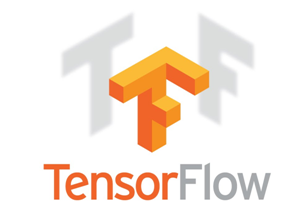

In [1]:
from IPython.display import Image
Image(filename='pic_dir/tf.png', width=250)

TensorFlow is an open source software library for **numerical computation** using **data flow graphs.**

### 非常重要：

In [ ]:
https://www.tensorflow.org/
https://github.com/tensorflow/tensorflow
https://github.com/tensorflow/models

#### 先睹为快：

In [ ]:
TensorFlow分类mnist

In [ ]:
MNIST数据集介绍（hello, world级别）
http://yann.lecun.com/exdb/mnist/
建议下载，速度快

MNIST数据库：
- 手写数字数据库
- 60000train+10000test
- 图片被规范处理过的，28x28灰度图

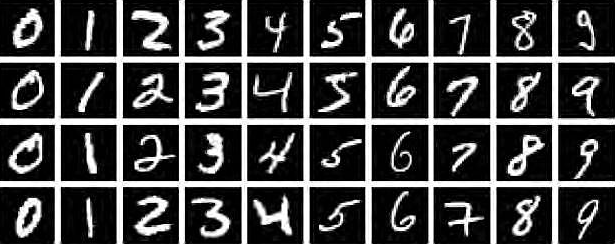

In [2]:
from IPython.display import Image
Image(filename='pic_dir/mnist.png', width=250)

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [4]:
batch_size = 128
num_classes = 10
epochs = 2 #这里是为了节省时间，增加次数会更准确
img_rows, img_cols = 28, 28

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- 关于后端：
- Theano是一个开源的符号主义张量操作框架，由蒙特利尔大学LISA/MILA实验室开发
- TensorFlow是一个符号主义的张量操作框架，由Google开发
- CNTK是一个由微软开发的商业级工具包
- Keras是一个纯Python编写的深度学习库，通过一系列的配置，可以工作在CNTK、Theano和Tensorflow等框架之上。“You have just found Keras”
- Caffe，主要用途用于快速特征提取的卷积架构，有一个模型百宝箱：Model Zoo
- PyTorch，由Torch7团队开发的一款深度学习框架
- PaddlePaddle，百度，源于产业实践的开源深度学习


In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# 标签独热编码
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
# 卷积核个数32，卷积核大小3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
#  池化核大小
model.add(MaxPooling2D(pool_size=(2, 2)))
# dropout防止过拟合第一个全连接
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# 第二个全连接
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
# Adadelta算法作为优化算法
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 114s - loss: 0.3357 - acc: 0.8983 - val_loss: 0.0797 - val_acc: 0.9741
Epoch 2/2
60000/60000 [==============================] - 114s - loss: 0.1137 - acc: 0.9665 - val_loss: 0.0536 - val_acc: 0.9816


In [12]:
# 模型评估
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0535911933767
Test accuracy: 0.9816


TensorFlow is an open source software library for **numerical computation** using **data flow graphs.**

- data flow graphs:
  - node:节点
    - 表示数学操作(mathematical operations)
    
  - edges(边)
    - 表示通过边进行沟通的多维数组(multidimensional data arrays)， 也就是我们所说的张量tensor

![](pic_dir/dataflow.gif)

张量

In [ ]:
张量是啥？（静态）

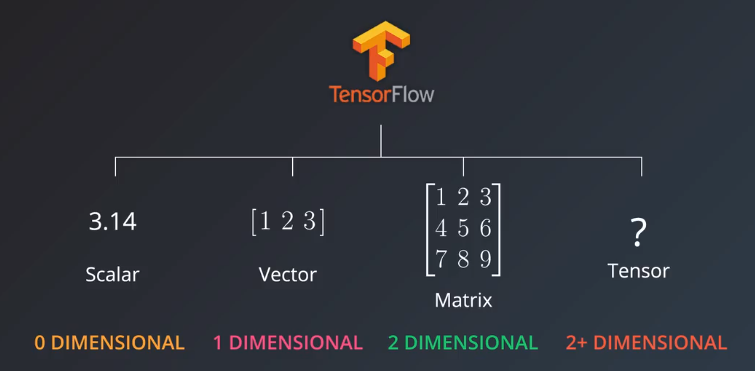

In [13]:
from IPython.display import Image
Image(filename='pic_dir/tensor.png', width=450)

In [14]:
import numpy as np
s = np.array(5) # 标量0维度
s.shape
x = s + 3
print(x)

v = np.array([1,2,3]) #vector 一维
x = v[1]
print(v[1:])


m = np.array([[1,2,3], [4,5,6], [7,8,9]]) # 矩阵 二维
print(m)

t = np.array([
    [[[1],[2]],[[3],[4]],[[5],[6]]],
    [[[7],[8]],[[9],[10]],[[11],[12]]
    ],
              [
                  [[13],[14]],
                  [[15],[16]],
                  [[17],[17]]]
])
# 张量 高维
print(t)
print(t.shape)

8
[2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[[ 1]
   [ 2]]

  [[ 3]
   [ 4]]

  [[ 5]
   [ 6]]]


 [[[ 7]
   [ 8]]

  [[ 9]
   [10]]

  [[11]
   [12]]]


 [[[13]
   [14]]

  [[15]
   [16]]

  [[17]
   [17]]]]
(3, 3, 2, 1)


In [15]:
# 再看一个例子：
3 # rank 0 tensor,标量 shape为 []
[1. ,2., 3.] #  rank 1 tensor，向量 shape为 [3]
[[1., 2., 3.], [4., 5., 6.]] #  rank 2 tensor，矩阵 shape为 [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # rank 3 tensor，张量  shape 为[2, 1, 3]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

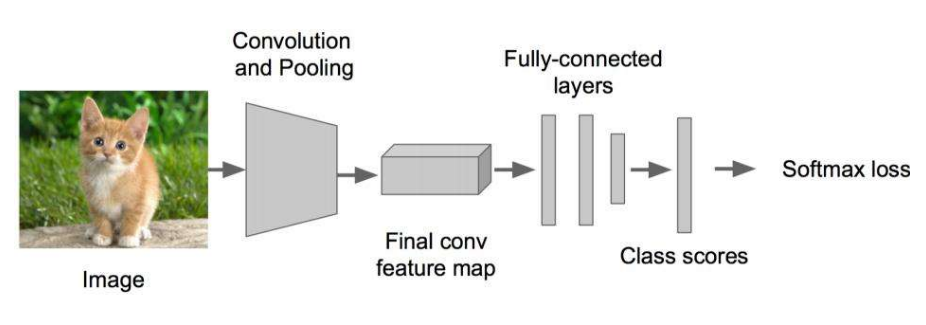

In [16]:
# 深度学习注意点
from IPython.display import Image
Image(filename='pic_dir/reshape.png', width=450)

In [17]:
#reshape
v = np.array([1,2,3,4])

x = v.reshape(1,4)
print(x)
x = v.reshape(4,1)
print(x)

[[1 2 3 4]]
[[1]
 [2]
 [3]
 [4]]


In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'1.2.1'

In [ ]:
1. 基本的操作

In [20]:
# 创建一个常量op，注意，这个op就是一个node

hello = tf.constant("Hello, TensorFlow!")
print(hello)
# 开启一个TF session
sess = tf.Session()

# 运行这个op
print(sess.run(hello))

Tensor("Const_52:0", shape=(), dtype=string)
b'Hello, TensorFlow!'


In [ ]:
计算图？（动态）

In [21]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly默认
node3 = tf.add(node1, node2)
node4 = tf.add(node1, node3)
#创建四个节点

In [22]:
print("node1:", node1)
print("node2:", node2)
print("node3:", node3)
print("node4:", node4)

node1: Tensor("Const_53:0", shape=(), dtype=float32)
node2: Tensor("Const_54:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)
node4: Tensor("Add_1:0", shape=(), dtype=float32)


In [23]:
#让计算沿着计算图进行
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


In [24]:
a = tf.placeholder(tf.float32) #比如输入，你又不知道
b = tf.placeholder(tf.float32)
adder_node = a + b  # + 可以表示 tf.add(a, b)
# 通过feed_dict喂给
print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]}))

7.5
[ 3.  7.]


In [25]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, feed_dict={a: 3, b:4.5}))

22.5


- 所以：要习惯将我们的计算过程，想象成沿着图进行
- 学习深度学习要学会画图

思考下面的语句：

In [ ]:
import tensorflow as tf
b = tf.Variable(tf.zeros([100]))
W = tf.Variable(tf.random_uniform([784, 100], -1, 1))
x = tf.placeholder(name = "x")
relu = tf.nn.relu(tf.matmul(W, x)+b)
C = [...]
s = tf.Session():
    #s.run()

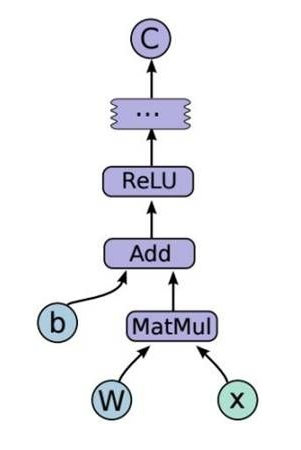

In [26]:
from IPython.display import Image
Image(filename='pic_dir/basicgraph.png', width=160)

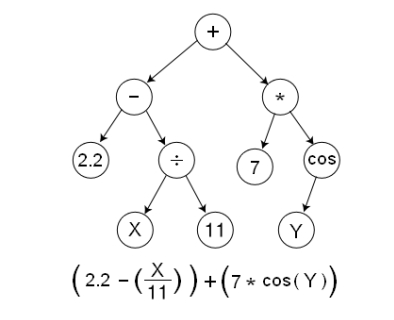

In [27]:
# 思考见过的神经网络的情况
from IPython.display import Image
Image(filename='pic_dir/basicgraph1.png', width=160)

步骤：
- 利用TensorFlow的operation，构建计算图
- 喂进去数据，run计算图
  - sess.run(op)
  - 把opeartion run起来
- 在图中更新变量（输出：返回值）

问题：operation可以是？（比如各种函数）

### 回顾线性回归：

- 线性假设

In [ ]:
h(x) = Wx + b # hypothesis = tf.matmul(X, w) + b

In [ ]:
cost function:

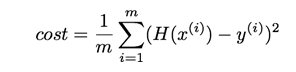

In [28]:
Image(filename='pic_dir/lmcost.png', width=250)

In [19]:
#cost = tf.square(Y - hypothesis)

In [ ]:
目标：最小化cost
算法：梯度下降

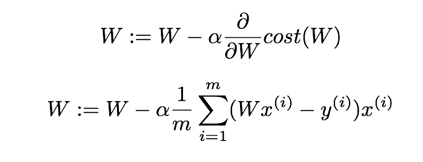

In [29]:
Image(filename='pic_dir/gdtf.png', width=250)

以上是我们手动算出来的迭代更新公式，用tf怎么做？

In [ ]:
cost = tf.square(Y - y_model)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [30]:
# 第一步，直接的例子
import tensorflow as tf

# X和Y
x_train = [1, 2, 3, 4, 5]
y_train = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 我们的线性回归假设
hypothesis = x_train * W + b

# cost function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# 最优化算法
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# 在session中启动计算图
sess = tf.Session()
# 在计算图中初始化全局变量
sess.run(tf.global_variables_initializer())

# 拟合
for step in range(10001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))
        
print("*"*80)
print(sess.run(W))

0 34.2606 [-1.03214502] [ 0.99728268]
20 0.334432 [ 0.61757219] [ 1.35205197]
40 0.291459 [ 0.649468] [ 1.26540244]
60 0.254533 [ 0.67245561] [ 1.18253863]
80 0.222285 [ 0.6939069] [ 1.10509312]
100 0.194123 [ 0.7139532] [ 1.03271973]
120 0.16953 [ 0.73268664] [ 0.9650861]
140 0.148051 [ 0.75019324] [ 0.90188181]
160 0.129294 [ 0.76655328] [ 0.84281683]
180 0.112914 [ 0.78184187] [ 0.78762013]
200 0.0986084 [ 0.79612923] [ 0.73603821]
220 0.0861154 [ 0.80948085] [ 0.68783456]
240 0.0752052 [ 0.82195807] [ 0.64278775]
260 0.0656773 [ 0.83361822] [ 0.60069096]
280 0.0573564 [ 0.84451473] [ 0.56135118]
300 0.0500898 [ 0.85469759] [ 0.52458787]
320 0.0437438 [ 0.86421353] [ 0.49023217]
340 0.0382018 [ 0.8731063] [ 0.45812649]
360 0.0333619 [ 0.88141662] [ 0.42812347]
380 0.0291352 [ 0.88918281] [ 0.40008533]
400 0.025444 [ 0.89644021] [ 0.37388346]
420 0.0222204 [ 0.90322244] [ 0.3493976]
440 0.0194053 [ 0.9095605] [ 0.32651529]
460 0.0169468 [ 0.91548347] [ 0.30513152]
480 0.0147997 [ 0.9

4140 1.43245e-12 [ 0.99999911] [  2.76636342e-06]
4160 1.41256e-12 [ 0.99999911] [  2.72106558e-06]
4180 1.41256e-12 [ 0.99999911] [  2.69245743e-06]
4200 1.41256e-12 [ 0.99999911] [  2.66384927e-06]
4220 1.41256e-12 [ 0.99999911] [  2.63524112e-06]
4240 1.2875e-12 [ 0.99999923] [  2.58517503e-06]
4260 1.25056e-12 [ 0.99999923] [  2.49934601e-06]
4280 1.25056e-12 [ 0.99999923] [  2.46119725e-06]
4300 1.25056e-12 [ 0.99999923] [  2.42304850e-06]
4320 1.25056e-12 [ 0.99999923] [  2.38489974e-06]
4340 1.09424e-12 [ 0.99999923] [  2.37393306e-06]
4360 1.09424e-12 [ 0.99999923] [  2.36439701e-06]
4380 1.09424e-12 [ 0.99999923] [  2.35486095e-06]
4400 1.09424e-12 [ 0.99999923] [  2.34532490e-06]
4420 1.09424e-12 [ 0.99999923] [  2.33578885e-06]
4440 1.09424e-12 [ 0.99999923] [  2.32625280e-06]
4460 1.09424e-12 [ 0.99999923] [  2.31671675e-06]
4480 1.09424e-12 [ 0.99999923] [  2.30718069e-06]
4500 1.09424e-12 [ 0.99999923] [  2.29764464e-06]
4520 1.09424e-12 [ 0.99999923] [  2.28810859e-06]
4

8260 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8280 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8300 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8320 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8340 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8360 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8380 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8400 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8420 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8440 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8460 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8480 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8500 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8520 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8540 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8560 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8580 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8600 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8620 1.02318e-12 [ 0.99999928] [  2.20514494e-06]
8640 1.02318e-12 [ 0.99999928] [  2.20514494e-06]


In [ ]:
# 第二步：用placeholders 和 feed_dict传入数据

In [23]:
import tensorflow as tf
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# 假设
hypothesis = X * W + b
#  loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# 启动计算图
sess = tf.Session()
# 初始化
sess.run(tf.global_variables_initializer())

# 拟合直线
for step in range(1001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: [1, 2, 3], Y: [1, 2, 3]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)
        
print('*'*80)


# 验证模型
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

0 24.7058 [-0.77542019] [-0.62380856]
20 0.226249 [ 0.78124487] [ 0.05358319]
40 0.00409352 [ 0.93180507] [ 0.11277424]
60 0.00189185 [ 0.94836736] [ 0.1133502]
80 0.00170165 [ 0.95206583] [ 0.10858266]
100 0.00154531 [ 0.95443964] [ 0.10353294]
120 0.00140348 [ 0.95659238] [ 0.09867234]
140 0.00127466 [ 0.95863348] [ 0.09403556]
160 0.00115766 [ 0.96057773] [ 0.08961622]
180 0.00105141 [ 0.96243042] [ 0.08540457]
200 0.000954906 [ 0.96419597] [ 0.08139087]
220 0.000867263 [ 0.96587867] [ 0.07756581]
240 0.000787661 [ 0.96748227] [ 0.07392051]
260 0.000715367 [ 0.96901041] [ 0.07044655]
280 0.000649705 [ 0.97046685] [ 0.06713583]
300 0.000590075 [ 0.97185481] [ 0.0639807]
320 0.000535917 [ 0.97317749] [ 0.06097383]
340 0.000486727 [ 0.97443801] [ 0.05810829]
360 0.000442055 [ 0.9756394] [ 0.0553774]
380 0.000401481 [ 0.97678423] [ 0.05277489]
400 0.000364629 [ 0.97787529] [ 0.05029467]
420 0.000331163 [ 0.97891504] [ 0.04793101]
440 0.000300772 [ 0.97990584] [ 0.04567853]
460 0.0002731

### 回顾logistic回归：

In [ ]:
h(x) = sigmoid(Wx + b) # hypothesis = tf.sigmoid(tf.matmul(X, w) + b)

In [ ]:
cost function:

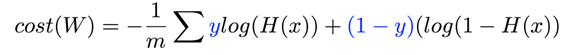

In [31]:
Image(filename='pic_dir/lrloss.png', width=350)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

In [25]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

# placeholders, 往里喂数据
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [26]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


# 模型假设
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

#  loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 计算acc，
# 如果hypothesis>0.5 则为True
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [27]:
# 启动计算图
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
            
    # acc 计算
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: \n", h, "\nCorrect (Y):\n ", c, "\nAccuracy: ", a)

0 2.59494
200 0.517836
400 0.477257
600 0.45102
800 0.431081
1000 0.414357
1200 0.399514
1400 0.385922
1600 0.373263
1800 0.361359
2000 0.350109
2200 0.339444
2400 0.329316
2600 0.319687
2800 0.310526
3000 0.301804
3200 0.293495
3400 0.285577
3600 0.278026
3800 0.270823
4000 0.263946
4200 0.257379
4400 0.251103
4600 0.245102
4800 0.23936
5000 0.233863
5200 0.228597
5400 0.22355
5600 0.21871
5800 0.214064
6000 0.209603
6200 0.205317
6400 0.201197
6600 0.197233
6800 0.193417
7000 0.189743
7200 0.186202
7400 0.182789
7600 0.179496
7800 0.176317
8000 0.173248
8200 0.170283
8400 0.167416
8600 0.164644
8800 0.161961
9000 0.159365
9200 0.15685
9400 0.154413
9600 0.152051
9800 0.14976
10000 0.147537

Hypothesis: 
 [[ 0.02992071]
 [ 0.1577208 ]
 [ 0.3009223 ]
 [ 0.78319007]
 [ 0.94070894]
 [ 0.98055011]] 
Correct (Y):
  [[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]] 
Accuracy:  1.0


In [ ]:
### 刚刚是模拟的数据，现在用实际数据进行测试

In [30]:
# 读入数据
xy = np.loadtxt('data/diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(type(x_data))
# placeholders 放tensor
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 模型假设
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
#  loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Acc计算
# hypothesis>0.5 为True
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# 启动计算图
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    feed = {X: x_data, Y: y_data}
    for step in range(10001):
        sess.run(train, feed_dict=feed)
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict=feed))

    # acc计算
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict=feed)
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

<class 'numpy.ndarray'>
0 0.972356
200 0.876271
400 0.826305
600 0.787316
800 0.753416
1000 0.723432
1200 0.696925
1400 0.673555
1600 0.652995
1800 0.634929
2000 0.619056
2200 0.605102
2400 0.592819
2600 0.581985
2800 0.572408
3000 0.563918
3200 0.556371
3400 0.549641
3600 0.543621
3800 0.53822
4000 0.533358
4200 0.528968
4400 0.524994
4600 0.521384
4800 0.518098
5000 0.515097
5200 0.512351
5400 0.509832
5600 0.507515
5800 0.50538
6000 0.503409
6200 0.501586
6400 0.499896
6600 0.498328
6800 0.496869
7000 0.495511
7200 0.494244
7400 0.493061
7600 0.491955
7800 0.49092
8000 0.48995
8200 0.489039
8400 0.488184
8600 0.48738
8800 0.486624
9000 0.485912
9200 0.48524
9400 0.484607
9600 0.484009
9800 0.483444
10000 0.482909

Hypothesis:  [[ 0.38027409]
 [ 0.90451646]
 [ 0.27359855]
 [ 0.9372229 ]
 [ 0.12947488]
 [ 0.7832036 ]
 [ 0.93281949]
 [ 0.57705981]
 [ 0.26380917]
 [ 0.5679881 ]
 [ 0.72095948]
 [ 0.1883229 ]
 [ 0.2743884 ]
 [ 0.18422762]
 [ 0.72318166]
 [ 0.47231761]
 [ 0.74091333]
 [ 0.

### softmax分类：

In [ ]:
sigmoid 函数替换：softmax
# 将sigmoid函数扩展到多分类情况

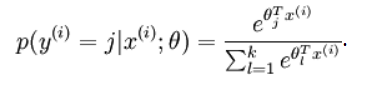

In [32]:
Image(filename='pic_dir/soft1.png', width=300)

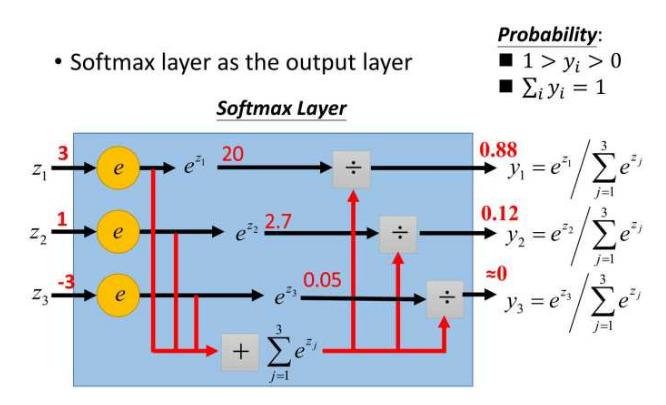

In [33]:
Image(filename='pic_dir/softmax.png', width=350)

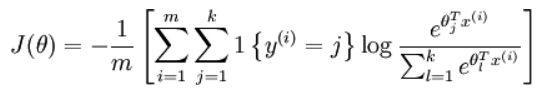

In [34]:
Image(filename='pic_dir/logloss1.png', width=350)

In [ ]:
# softmax
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

In [ ]:
# loss function
# 定义Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [36]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
          [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0],
          [1, 0, 0]]
# 分类label做独热编码

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax 计算 softmax
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 启动计算图
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(3001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.arg_max(a, 1)))
    

    all = sess.run(hypothesis, feed_dict={X: [[1, 2, 1, 1], 
                                          [1, 3, 4, 3], 
                                          [1, 1, 0, 1]]})
    print(all, sess.run(tf.arg_max(all, 1)))

0 3.23332
200 0.542078
400 0.442226
600 0.365946
800 0.292688
1000 0.236812
1200 0.214294
1400 0.195606
1600 0.179828
1800 0.166333
2000 0.154664
2200 0.144479
2400 0.135516
2600 0.127571
2800 0.120482
3000 0.114121
[[  6.79431134e-04   9.99318004e-01   2.60072420e-06]] [1]
[[  3.18308196e-07   3.61669547e-04   9.99637961e-01]
 [  9.36256886e-01   5.88902086e-02   4.85298596e-03]
 [  3.03843062e-10   7.91391722e-05   9.99920845e-01]] [2 0 2]


In [ ]:
### 用softmax进行mnist分类
# 把mnist当成一个多分类任务， softmax回归（相对二分类的logistic 回归）

In [29]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(2017)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0001 cost = 2.875257794
Epoch: 0002 cost = 1.126097451
Epoch: 0003 cost = 0.877140804
Epoch: 0004 cost = 0.757287879
Epoch: 0005 cost = 0.683898570
Epoch: 0006 cost = 0.633187077
Epoch: 0007 cost = 0.595524568
Epoch: 0008 cost = 0.565773834
Epoch: 0009 cost = 0.541861632
Epoch: 0010 cost = 0.522030206
Epoch: 0011 cost = 0.505137566
Epoch: 0012 cost = 0.490640295
Epoch: 0013 cost = 0.477223042
Epoch: 0014 cost = 0.466279365
Epoch: 0015 cost = 0.456349415
Learning finished
Accuracy:  0.8898
原标签:  [2]
预测值:  [2]


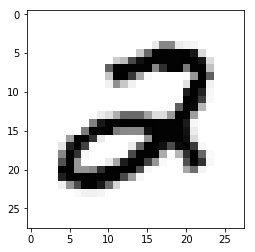

In [31]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 数字 10 类
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# softmax假设
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 模型检验
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# 计算acc
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 超参
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # 初始化
    sess.run(tf.global_variables_initializer())
    # 开始训练
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # 使用测试集进行测试
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))


    # 拿一个实际的数字测试（随机抽一张）
    r = random.randint(0, mnist.test.num_examples - 1)
    print("原标签: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("预测值: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

Label:  [2]
Prediction:  [0]


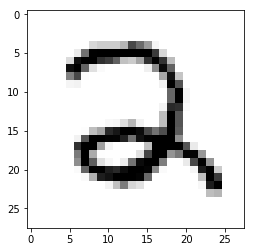

In [33]:
# 没有训练的情况
with tf.Session() as sess:
    # 初始化
    sess.run(tf.global_variables_initializer())
    # 选择一个预测
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

看了这些，神经网络呢？

### NN神经网络先睹为快：（效果）

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 158.435969563
Epoch: 0002 cost = 39.939808919
Epoch: 0003 cost = 24.658840400
Epoch: 0004 cost = 16.910988502
Epoch: 0005 cost = 12.150328786
Epoch: 0006 cost = 8.897124584
Epoch: 0007 cost = 6.623214979
Epoch: 0008 cost = 4.878505614
Epoch: 0009 cost = 3.801874773
Epoch: 0010 cost = 2.733897227
Epoch: 0011 cost = 2.051842461
Epoch: 0012 cost = 1.556440851
Epoch: 0013 cost = 1.081422401
Epoch: 0014 cost = 0.880088805
Epoch: 0015 cost = 0.726613859
Learning Finished!
Accuracy: 0.9486
Label:  [5]
Prediction:  [5]


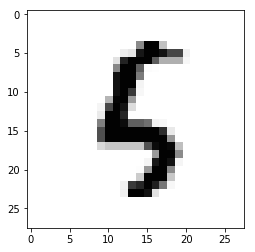

In [44]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(2017)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# 超参（在开始学习过程之前设置值的参数，而不是通过训练得到的参数数据）
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# 神经网络各个层的weights & bias
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# 定义 cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# 初始化
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 开始训练
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# 测试模型准确率
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# 获取一个测试
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28),cmap='Greys',
           interpolation='nearest')
plt.show()

让我们来到NN的地盘